<a href="https://colab.research.google.com/github/RajnishProgrammer/Google-Colab/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Data Collection and Saving For Future Use

In [ ]:
import kagglehub
import shutil
import os

# Download latest version
save_path = r"/content/drive/MyDrive/Colab Notebooks/"
dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
shutil.move(dataset_path, os.path.join(save_path, os.path.basename(dataset_path)))
print("Path to dataset files:", dataset_path)
print('Dataset moved to: ', os.path.join(save_path, os.path.basename(dataset_path)))

# 📍 We can start running the cells from here

✅ First we need to mount the drive to run below cell

In [ ]:
import pandas as pd

url = "/content/drive/MyDrive/Colab Notebooks/1/dataset.csv"
df = pd.read_csv(url)

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

# 📌 Data Preprocessing

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'track_id'])

In [ ]:
df.isnull().sum()

,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


In [ ]:
# these features contain missing values
# artists	1
# album_name	1
# track_name 1
df['artists'].fillna('Unknown', inplace=True)
df['album_name'].fillna('Unknown', inplace=True)
df['track_name'].fillna('Unknown', inplace=True)

<ipython-input-5-318ec526312e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['artists'].fillna('Unknown', inplace=True)
<ipython-input-5-318ec526312e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
from sklearn.preprocessing import LabelEncoder

genre_encoder = LabelEncoder()
df['track_genre'] = genre_encoder.fit_transform(df['track_genre'])

# artists
# artist_encoder = LabelEncoder()
# df['artists'] = artist_encoder.fit_transform(df['artists'])

In [ ]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


# 📌 Building Content-Based Filtering Model

In [ ]:
import pandas as pd

features = [
    "danceability", "energy", "loudness", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "tempo"
]

feature_matrix = df[features]
feature_matrix.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_matrix_scaled = scaler.fit_transform(feature_matrix)

# Convert back to DataFrame for easy interpretation
feature_matrix_scaled = pd.DataFrame(feature_matrix_scaled, columns=features)

feature_matrix_scaled.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863
1,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717
2,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312
3,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859
4,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348


# Don't run this cell

In [ ]:
# if scaling is not done then do that first scaling is important for similarity scores
# compute similarity between songs
# in this i've tried to compute similarity score with bathc processing due to limited resources
# but it did't work !!
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm

def batch_cosine_similarity(X, batch_size=5000):
  num_samples = X.shape[0]
  similarity_matrix = np.zeros((num_samples, num_samples))

  for start in tqdm(range(0, num_samples, batch_size), desc='Computing Similarity', unit='batch'):
    end = min(start+batch_size, num_samples)
    similarity_matrix[start:end] = cosine_similarity(X[start:end], X)
  return similarity_matrix
similarity_matrix = batch_cosine_similarity(feature_matrix_scaled)
similarity_matrix.shape

Computing Similarity:   0%|          | 0/23 [00:08<?, ?batch/s]


KeyboardInterrupt: 

### 🚀 Next I am going to implement ML solution for building Recommendation System

In [ ]:
# so i need to use nearest neighbors model as i have low resources
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(feature_matrix_scaled)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# This funciton helps you to get your recommended songs
def recommend_songs_optimized(song_name, df, nn_model, top_n=5):
  song_index = df[df['track_name'].str.lower() == song_name.lower()].index

  if song_index.empty:
    print('song not found!')
    return

  song_index = song_index[0]
  distances, indices = nn_model.kneighbors([feature_matrix_scaled.iloc[song_index]], n_neighbors=top_n+1)
  recommended_songs = df.iloc[indices[0][1:]]
  return recommended_songs

In [ ]:
# Let's try
recommend_songs_optimized("Shape of You", df, nn).iloc[:,:3]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,artists,album_name,track_name
7404,Clarence White,Flatpick (Collector's Deluxe Edition),Reno Ride
7815,Steve Martin;Steep Canyon Rangers,“The Long-Awaited Album”,Always Will
16710,Wolfgang Amadeus Mozart;Erik Smith,Mozart - Inspiring Classics,"Minuet in F, K.1d"
16910,Wolfgang Amadeus Mozart;Erik Smith,Mozart - Inspiring Classics,"Minuet in F, K.1d"
76731,Jean-Philippe Rameau;Jordi Savall;Le Concert D...,Rameau: L'Orchestre de Louis XV,Les Indes Galantes - Air pour les esclaves afr...


In [ ]:
songs = recommend_songs_optimized("Hold On", df, nn).iloc[:,:3]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
songs

,artists,album_name,track_name
954,Chord Overstreet,Hold On,Hold On
70453,Jay Chou,八度空間,分裂
54150,Kyson,Run,Run
54102,Kyson,Lucky Notes,Run
38544,Mando Diao,I solnedgången,Tid tröste


###🚀 This time we go lit bit advance, let's use Deep Learning for Recommendation System

# Working on song_embeddings
# Model exp 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_shape = feature_matrix_scaled.shape[1]

input_layer = Input(shape=(input_shape,))
embedding_layer = Dense(64, activation='relu')(input_layer)
embedding_layer = Dense(32, activation='relu')(embedding_layer)  # Compressed feature representation
output_layer = Dense(input_shape, activation='linear')(embedding_layer)

embedding_model = Model(input_layer, output_layer)
embedding_model.compile(optimizer='adam', loss='mse')

embedding_model.fit(feature_matrix_scaled, feature_matrix_scaled, epochs=10, batch_size=256, validation_split=0.1)

# Extract song embeddings
encoder = Model(input_layer, embedding_layer)  # Extract encoder part
song_embeddings = embedding_model.predict(feature_matrix_scaled)

Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3491 - val_loss: 0.0093
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0067 - val_loss: 0.0045
Epoch 3/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 4/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 5/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - val_loss: 9.3406e-04
Epoch 7/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.0254e-04 - val_loss: 6.1180e-04
Epoch 8/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5599e-04 - val_loss: 4.0796e-04
Epoch 9/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9078e-04 - val_loss: 2.7186e-04
Epoch 10/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8812e-04 - val_loss: 1.6890e-04
3563/3563 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


# Improving the model
# Model exp 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

input_shape = feature_matrix_scaled.shape[1]

input_layer = Input(shape=(input_shape,))
embedding_layer = Dense(64, activation='relu')(input_layer)
embedding_layer = Dense(32, activation='relu')(embedding_layer)  # Compressed feature representation
output_layer = Dense(input_shape, activation='linear')(embedding_layer)

embedding_model = Model(input_layer, output_layer)
embedding_model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
embedding_model.fit(feature_matrix_scaled, feature_matrix_scaled, epochs=50, batch_size=256, validation_split=0.1, callbacks=[early_stopping])

# Extract song embeddings
encoder = Model(input_layer, embedding_layer)  # Extract encoder part
song_embeddings = embedding_model.predict(feature_matrix_scaled)

Epoch 1/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4336 - val_loss: 0.0091
Epoch 2/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0066 - val_loss: 0.0041
Epoch 3/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 4/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 5/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.8004e-04 - val_loss: 8.0045e-04
Epoch 7/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5186e-04 - val_loss: 5.0755e-04
Epoch 8/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1699e-04 - val_loss: 3.2082e-04
Epoch 9/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6216e-04 - val_loss: 1.9394e-04
Epoch 10/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5356e-04 - val_loss: 1.1204e-04
Epoch 11/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5752e-05 - val_loss: 6.0328e-05
Epoc

# 🛑 This one is the last exp --> fine tuned model where,
- dropout = 0.2
- learning rate = 1e-4

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

input_shape = feature_matrix_scaled.shape[1]

input_layer = Input(shape=(input_shape,))
embedding_layer = Dense(64, activation='relu')(input_layer)
embedding_layer = Dropout(0.2)(embedding_layer) # dropout of 20%
embedding_layer = Dense(32, activation='relu')(embedding_layer)  # Compressed feature representation
output_layer = Dense(input_shape, activation='linear')(embedding_layer)

embedding_model = Model(input_layer, output_layer)
embedding_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
embedding_model.fit(feature_matrix_scaled, feature_matrix_scaled, epochs=50, batch_size=256, validation_split=0.1, callbacks=[early_stopping])

# Extract song embeddings
encoder = Model(input_layer, embedding_layer)  # Extract encoder part
song_embeddings = embedding_model.predict(feature_matrix_scaled)

Epoch 1/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.0485 - val_loss: 0.4313
Epoch 2/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4192 - val_loss: 0.1588
Epoch 3/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1893 - val_loss: 0.0676
Epoch 4/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1268 - val_loss: 0.0397
Epoch 5/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1033 - val_loss: 0.0284
Epoch 6/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0908 - val_loss: 0.0220
Epoch 7/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0814 - val_loss: 0.0178
Epoch 8/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0754 - val_loss: 0.0147
Epoch 9/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0708 - val_loss: 0.0126
Epoch 10/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0666 - val_loss: 0.0109
Epoch 11/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0636 - val_loss: 0.0098
Epoch 12/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [ ]:
song_embeddings[:5]

array([[ 0.6709862 , -0.6132688 ,  0.23598745,  0.48049232, -0.7345293 ,
        -0.5653513 ,  0.7150837 ,  0.9455389 , -0.9785322 ],
       [-0.8669978 , -1.9399459 , -1.6831623 , -0.12859713,  1.7545499 ,
        -0.4310654 , -0.56559336, -0.8331996 , -1.3887963 ],
       [-0.74951214, -1.0458231 , -0.35759854, -0.34750265, -0.21371202,
        -0.5022179 , -0.44980493, -1.2372962 , -1.5064839 ],
       [-1.6223989 , -2.1463125 , -1.9734092 , -0.5119917 ,  1.8445342 ,
        -0.3541043 , -0.4441404 , -1.1835266 ,  1.8133601 ],
       [ 0.32165632, -0.73410714, -0.20908536, -0.30441874,  0.54720426,
        -0.51521677, -0.69504404, -1.1038599 , -0.09478711]],
      dtype=float32)

##🚀 Now let's recommend songs with song_embeddings

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(metric="cosine", algorithm="brute")
nn.fit(song_embeddings)

def recommend_songs_nn(song_name, df, song_embeddings, nn_model, top_n=15):
    song_index = df[df["track_name"].str.lower() == song_name.lower()].index

    if song_index.empty:
        print("Song not found!")
        return []

    song_index = song_index[0]

    distances, indices = nn_model.kneighbors([song_embeddings[song_index]], n_neighbors=top_n+1)

    return df.iloc[indices[0][1:]]

In [ ]:
recommend_songs_nn("Shape of You", df, song_embeddings, nn)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
16910,Wolfgang Amadeus Mozart;Erik Smith,Mozart - Inspiring Classics,"Minuet in F, K.1d",3,79360,False,0.478,0.185,5,-16.501,1,0.0370,0.693,0.907,0.0665,0.941,103.495,3,16
16710,Wolfgang Amadeus Mozart;Erik Smith,Mozart - Inspiring Classics,"Minuet in F, K.1d",3,79360,False,0.478,0.185,5,-16.501,1,0.0370,0.693,0.907,0.0665,0.941,103.495,3,16
7404,Clarence White,Flatpick (Collector's Deluxe Edition),Reno Ride,24,65280,False,0.502,0.317,2,-15.961,1,0.0352,0.932,0.902,0.0999,0.925,111.601,4,7
7815,Steve Martin;Steep Canyon Rangers,“The Long-Awaited Album”,Always Will,22,85920,False,0.450,0.186,0,-14.866,1,0.0393,0.932,0.850,0.1200,0.886,95.845,4,7
45913,Danny Carvalho,Slack Key Journey - On My Way,Keali'i's Mele,20,95360,False,0.491,0.339,0,-15.221,1,0.0412,0.899,0.903,0.1060,0.789,115.811,3,45
16081,Johann Sebastian Bach;Orion Weiss,Yarlung Records: Fifteen Years,"Overture in the French Style, Op. 2, BWV 831 (...",0,176963,False,0.522,0.215,11,-21.148,0,0.0655,0.992,0.912,0.0971,0.934,103.767,4,16
16031,Johann Sebastian Bach;Orion Weiss,Yarlung Records: Fifteen Years,"Overture in the French Style, Op. 2, BWV 831 (...",0,176963,False,0.522,0.215,11,-21.148,0,0.0655,0.992,0.912,0.0971,0.934,103.767,4,16
39083,Johann Sebastian Bach;Orion Weiss,Yarlung Records: Fifteen Years,"Overture in the French Style, Op. 2, BWV 831 (...",0,176963,False,0.522,0.215,11,-21.148,0,0.0655,0.992,0.912,0.0971,0.934,103.767,4,39
79949,Eudóxia De Barros,Lua Branca (Piano),Brasileirinho,27,146120,False,0.427,0.314,5,-16.865,1,0.0367,0.960,0.895,0.0960,0.928,105.850,4,79
16895,Wolfgang Amadeus Mozart;The English Concert;Tr...,Mozart - All Day Classics,"Symphony No. 24 in B Flat, K.182: 3. Allegro",8,87866,False,0.589,0.243,10,-16.728,1,0.0635,0.938,0.951,0.0875,0.672,110.947,4,16


In [ ]:
recommend_songs_nn("don't let me down", df, song_embeddings, nn).iloc[:, :3]

,artists,album_name,track_name
30062,The Chainsmokers;Daya,Don't Let Me Down,Don't Let Me Down
53012,The Chainsmokers;Daya,Don't Let Me Down,Don't Let Me Down
20113,The Chainsmokers;Daya,Don't Let Me Down,Don't Let Me Down
49175,Nick Novity;D-Ceptor,Going Down,Going Down
27485,Danny Byrd;Mc Risky,Fifteen Years Of Hospital,B.R.I.S.T.O.L
15585,Koven;ROY KNOX,About Me,About Me
29131,Koven;ROY KNOX,About Me,About Me
28131,Koven;ROY KNOX,About Me,About Me
61794,Shiritsu Ebisu Chugaku,「中辛」〜エビ中のワクワクベスト〜,サドンデス
58592,Static-X,Cannibal,Chemical Logic


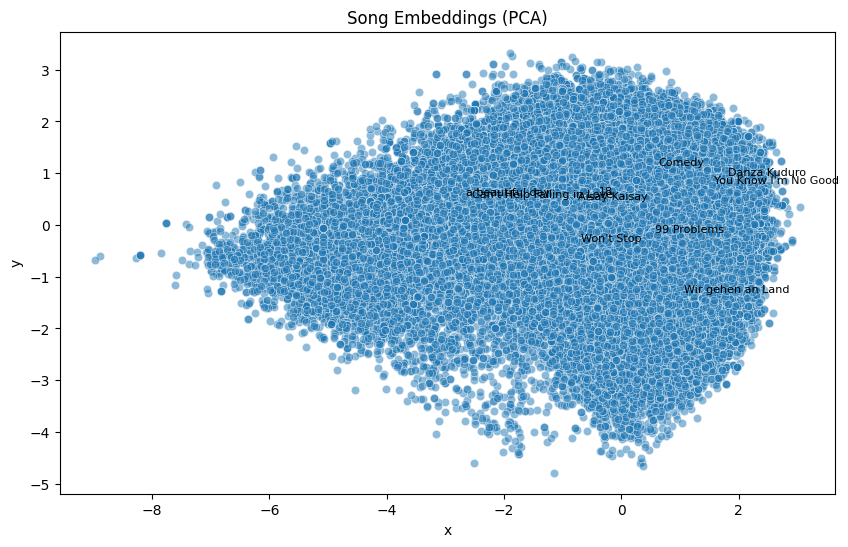

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(song_embeddings)

embedding_df = pd.DataFrame(reduced_embeddings, columns=['x', 'y'])
embedding_df["track_name"] = df["track_name"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=embedding_df, alpha=0.5)

for i in range(0, len(embedding_df), len(embedding_df)//10):
    plt.text(embedding_df.iloc[i]["x"], embedding_df.iloc[i]["y"], embedding_df.iloc[i]["track_name"], fontsize=8)

plt.title("Song Embeddings (PCA)")
plt.show()

# ♻ Saving Model, df, song_embeddings

In [ ]:
import joblib

joblib.dump(nn, '/content/drive/MyDrive/Colab Notebooks/nn_recommendation_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/nn_recommendation_model.pkl']

In [ ]:
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/spotify_tracks_df.pkl', 'wb') as f:
  pickle.dump(df, f)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/spotify_tracks.csv', index=False)

In [ ]:
import numpy as np

np.save('/content/drive/MyDrive/Colab Notebooks/song_embeddings.npy', song_embeddings)

# 🚀 Deployment Using FastAPI, uvicorn, ngrok

In [ ]:
! pip install fastapi uvicorn nest-asyncio pyngrok joblib numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
import joblib
import pickle
import numpy as np
import pandas as pd

nn = joblib.load('/content/drive/MyDrive/Colab Notebooks/nn_recommendation_model.pkl')

with open("/content/drive/MyDrive/Colab Notebooks/spotify_tracks_df.pkl", 'rb') as f:
  df = pickle.load(f)

song_embeddings = np.load('/content/drive/MyDrive/Colab Notebooks/song_embeddings.npy')

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np

app = FastAPI()

class SongRequest(BaseModel):
  song_name: str
  top_n: int = 5

def recommend_songs_nn(song_name, df, song_embeddings, nn_model, top_n=5):
    song_index = df[df["track_name"].str.lower() == song_name.lower()].index

    if song_index.empty:
        return {"error": "Song not found!"}

    song_index = song_index[0]

    distances, indices = nn_model.kneighbors([song_embeddings[song_index]], n_neighbors=top_n+1)

    recommended_songs = df.iloc[indices[0][1:]]["track_name"].tolist()

    return {"recommended_songs": recommended_songs}

@app.post("/recommend")
def recommend(request: SongRequest):
  return recommend_songs_nn(request.song_name, df, song_embeddings, nn, request.top_n)

In [ ]:
from fastapi import FastAPI, Request
from fastapi.responses import HTMLResponse
from pydantic import BaseModel
import numpy as np

app = FastAPI()

# Define request model
class SongRequest(BaseModel):
    song_name: str
    top_n: int = 5

# Recommendation function
def recommend_songs_nn(song_name, df, song_embeddings, nn_model, top_n=5):
    song_index = df[df["track_name"].str.lower() == song_name.lower()].index

    if song_index.empty:
        return {"error": "Song not found!"}

    song_index = song_index[0]

    # Find nearest neighbors based on embeddings
    distances, indices = nn_model.kneighbors([song_embeddings[song_index]], n_neighbors=top_n+1)

    recommended_songs = df.iloc[indices[0][1:]][["track_name", "artists", "album_name"]].to_dict(orient='records')

    return recommended_songs

# Serve an HTML page with an input form
@app.get("/", response_class=HTMLResponse)
def home():
    return """
    <html>
    <head>
        <title>Music Recommendation</title>
        <style>
            body { font-family: Arial, sans-serif; text-align: center; margin-top: 50px; }
            input, button { padding: 10px; font-size: 16px; }
            #result { margin-top: 20px; font-size: 18px; }
        </style>
    </head>
    <body>
        <h2>Enter a Song Name for Recommendations</h2>
        <form action="/recommend" method="get">
            <input type="text" name="song_name" placeholder="Enter song name" required>
            <button type="submit">Get Recommendations</button>
        </form>
        <div id="result"></div>
    </body>
    </html>
    """

# Create an endpoint to return recommendations as HTML
@app.get("/recommend", response_class=HTMLResponse)
def recommend_page(song_name: str, top_n: int = 5):
    recommendations = recommend_songs_nn(song_name, df, song_embeddings, nn, top_n)

    if isinstance(recommendations, dict) and "error" in recommendations:
        return f"<h3 style='color:red;'>Error: {recommendations['error']}</h3>"

    # Format results
    result_html = "<ul style='list-style:none; font-size:18px;'>"
    for song in recommendations:
        result_html += f"<li><b>{song['track_name']}</b> by {song['artists']} ({song['album_name']})</li>"
    result_html += "</ul>"

    return f"""
    <html>
    <body style="text-align:center;">
        <h2>Recommendations for '{song_name}'</h2>
        {result_html}
        <a href="/">🔙 Try Another Song</a>
    </body>
    </html>
    """

In [ ]:
artists	album_name	track_name

In [ ]:
def recommend_songs_nn(song_name, df, song_embeddings, nn_model, top_n=5):
    song_index = df[df["track_name"].str.lower() == song_name.lower()].index

    if song_index.empty:
        return {"error": "Song not found!"}

    song_index = song_index[0]

    # Find nearest neighbors based on embeddings
    distances, indices = nn_model.kneighbors([song_embeddings[song_index]], n_neighbors=top_n+1)

    recommended_songs = df.iloc[indices[0][1:]][["track_name", "artists", "album_name"]].to_dict(orient='records')

    return recommended_songs

In [ ]:
recommend_songs_nn('shape of you', df, song_embeddings, nn)

[{'track_name': 'Minuet in F, K.1d',
  'artists': 'Wolfgang Amadeus Mozart;Erik Smith',
  'album_name': 'Mozart - Inspiring Classics'},
 {'track_name': 'Minuet in F, K.1d',
  'artists': 'Wolfgang Amadeus Mozart;Erik Smith',
  'album_name': 'Mozart - Inspiring Classics'},
 {'track_name': 'Reno Ride',
  'artists': 'Clarence White',
  'album_name': "Flatpick (Collector's Deluxe Edition)"},
 {'track_name': 'Always Will',
  'artists': 'Steve Martin;Steep Canyon Rangers',
  'album_name': '“The Long-Awaited Album”'},
 {'track_name': "Keali'i's Mele",
  'artists': 'Danny Carvalho',
  'album_name': 'Slack Key Journey - On My Way'}]

In [ ]:
import nest_asyncio
import uvicorn
from pyngrok import ngrok

nest_asyncio.apply()

! ngrok authtoken 2sXnC1k3Jv39N7S4dk58PF7AKLR_7kugrF1FyFLkp3Pg9np7a

public_url = ngrok.connect(8000).public_url
print(f"Public API URL: {public_url}")

uvicorn.run(app, host='0.0.0.0', port=8000)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public API URL: https://4b4e-35-201-162-82.ngrok-free.app


INFO:     Started server process [397]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     103.241.82.154:0 - "GET / HTTP/1.1" 200 OK
INFO:     103.241.82.154:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     103.241.82.154:0 - "GET /recommend?song_name=shape+of+you HTTP/1.1" 200 OK
INFO:     103.241.82.154:0 - "GET / HTTP/1.1" 200 OK
INFO:     103.241.82.154:0 - "GET /recommend?song_name=blinding+lights HTTP/1.1" 200 OK
INFO:     103.241.82.154:0 - "GET / HTTP/1.1" 200 OK
INFO:     103.241.82.154:0 - "GET /recommend?song_name=see+you+again HTTP/1.1" 200 OK
